In [115]:
import pandas
import seaborn
import matplotlib

pandas.options.display.max_columns = None
pandas.options.display.max_colwidth = None
pandas.options.display.max_rows = None

seaborn.set_style("darkgrid")

In [116]:
data = pandas.read_csv(r"C:\Users\Albraa Alsakor\Programming\data-analytics-case-studies\healthcare-strokes\data\healthcare-dataset-stroke-data.csv",low_memory=False,memory_map=True)
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [117]:
data.columns = data.columns.str.lower()
data = data.rename(columns={
    "hypertension":"has_hypertension",
    "heart_disease":"has_heart_disease",
    "stroke":"had_stroke"
})
data["has_hypertension"] = data["has_hypertension"].astype(bool)
data["has_heart_disease"] = data["has_heart_disease"].astype(bool)
data["had_stroke"] = data["had_stroke"].astype(bool)

data.head(5)

,id,gender,age,has_hypertension,has_heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,had_stroke
0,9046,Male,67.0,False,True,Yes,Private,Urban,228.69,36.6,formerly smoked,True
1,51676,Female,61.0,False,False,Yes,Self-employed,Rural,202.21,NaN,never smoked,True
2,31112,Male,80.0,False,True,Yes,Private,Rural,105.92,32.5,never smoked,True
3,60182,Female,49.0,False,False,Yes,Private,Urban,171.23,34.4,smokes,True
4,1665,Female,79.0,True,False,Yes,Self-employed,Rural,174.12,24.0,never smoked,True


In [118]:
print(data["age"].min())
print(data["age"].max())

0.08
82.0


In [119]:
age = data.loc[(data["had_stroke"]==True),["age","id"]].rename(columns={"id":"patients"})
age["age"] = (age["age"]/10).round() * 10
age = age.groupby("age").count()

# seaborn.barplot(age,x="age",y="patients")
age

,patients
age,
0.0,1
10.0,1
30.0,1
40.0,10
50.0,24
60.0,56
70.0,54
80.0,102


<Axes: xlabel='age', ylabel='avg_glucose_level'>

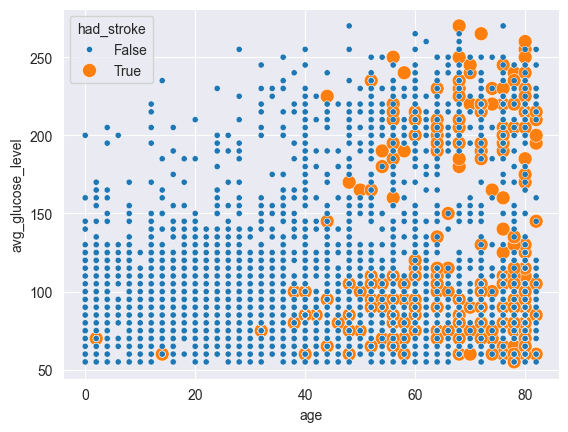

In [120]:
age_x_glucose = data.loc[:,["age","avg_glucose_level","had_stroke"]]
age_x_glucose["age"] = (age_x_glucose["age"]/2).round() *2
age_x_glucose["avg_glucose_level"] = (age_x_glucose["avg_glucose_level"]/5).round() * 5
age_x_glucose["had_stroke_int"] = age_x_glucose["had_stroke"].astype(int)

seaborn.scatterplot(age_x_glucose, x="age",y="avg_glucose_level",hue="had_stroke",size="had_stroke",sizes=(100,20))